In [98]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [99]:
df = pd.read_csv('ETL_Hospitalizacion.csv')
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0,0
562,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
563,69,NO,NO,4.43,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,20,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0,0
564,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0


In [100]:
def verificar_tipo_datos(df):

    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))

    df_info = pd.DataFrame(mi_dict)

    for columna in df.columns:
        print(columna, " (nulos) = ", df[columna].isnull().sum(),"/", len(df))
        
    return df_info

In [101]:
verificar_tipo_datos(df)

EDAD  (nulos) =  0 / 566
DIABETES  (nulos) =  0 / 566
HOSPITALIZACIÓN ULTIMO MES  (nulos) =  0 / 566
PSA  (nulos) =  4 / 566
BIOPSIAS PREVIAS  (nulos) =  0 / 566
VOLUMEN PROSTATICO  (nulos) =  0 / 566
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  (nulos) =  0 / 566
NUMERO DE MUESTRAS TOMADAS  (nulos) =  0 / 566
CUP  (nulos) =  0 / 566
ENF. CRONICA PULMONAR OBSTRUCTIVA  (nulos) =  0 / 566
BIOPSIA  (nulos) =  0 / 566
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA  (nulos) =  0 / 566
FIEBRE  (nulos) =  0 / 566
ITU  (nulos) =  0 / 566
TIPO DE CULTIVO  (nulos) =  0 / 566
AGENTE AISLADO  (nulos) =  0 / 566
PATRON DE RESISTENCIA  (nulos) =  0 / 566
HOSPITALIZACION  (nulos) =  0 / 566
DIAS HOSPITALIZACION MQ  (nulos) =  0 / 566
DIAS HOSPITALIZACIÓN UPC  (nulos) =  0 / 566


,nombre_campo,tipo_datos,no_nulos_%,nulos_%
0,EDAD,[<class 'int'>],100.00,0.00
1,DIABETES,[<class 'str'>],100.00,0.00
2,HOSPITALIZACIÓN ULTIMO MES,[<class 'str'>],100.00,0.00
3,PSA,[<class 'float'>],99.29,0.71
4,BIOPSIAS PREVIAS,[<class 'str'>],100.00,0.00
5,VOLUMEN PROSTATICO,[<class 'str'>],100.00,0.00
6,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,[<class 'str'>],100.00,0.00
7,NUMERO DE MUESTRAS TOMADAS,[<class 'int'>],100.00,0.00
8,CUP,[<class 'str'>],100.00,0.00
9,ENF. CRONICA PULMONAR OBSTRUCTIVA,[<class 'str'>],100.00,0.00


In [102]:
def verificar_datos_unicos(df):

    columnas_df = df.columns.tolist()
    tipos_datos = [float, int, str]
    for columna in columnas_df:
        for tipo in tipos_datos:
            filtro = df[columna][df[columna].apply(lambda x: isinstance(x, tipo))]
            valores_unicos = filtro.unique()
            print(columna, " (", tipo.__name__, ") ", len(valores_unicos),": ", valores_unicos)
        print("")

In [103]:

verificar_datos_unicos(df)

EDAD  ( float )  0 :  []
EDAD  ( int )  43 :  [53 56 57 55 67 69 44 54 68 43 65 62 71 64 77 75 73 63 66 84 42 61 47 48
 49 81 52 74 70 58 59 60 50 76 78 46 51 79 39 72 80 45 82]
EDAD  ( str )  0 :  []

DIABETES  ( float )  0 :  []
DIABETES  ( int )  0 :  []
DIABETES  ( str )  2 :  ['NO' 'SI']

HOSPITALIZACIÓN ULTIMO MES  ( float )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( int )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( str )  2 :  ['NO' 'SI']

PSA  ( float )  147 :  [  4.     7.7   29.     7.     6.2    6.      nan   5.7    4.3    5.19
   4.5   14.    10.     9.    25.    91.8   21.    98.     7.5   10.8
  10.5   90.     5.1   16.    17.    23.     6.4  100.     5.8   38.9
  20.    40.     9.5    9.6   10.2    8.5   53.    19.     5.6    3.5
  15.     5.2   17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7
  18.    27.     5.     8.39   4.79   6.8    4.9    7.8   16.2    8.3
   6.5    7.2    5.97   6.98  12.    24.     8.9    6.3    9.3   12.6
   5.5   13.8   13.4   11.    21.3    7.1   

ELIMINO 4 REGISTROS NULOS EN PSA, SOLO UNO DE ELLOS TERMINABA EN HOSPITALIZACION, DE LAS OTRAS VARIABLES CATEGORICAS TENIA LA MAYORIA EN 'NO'
SE ELIMINAN LAS COLUMNAS HOSPITALIZACION MQ, DIAS POST BIOPSIA COMPLICACION INFECCION (537 valores 'NO') Y UPC PORQUE NO APORTAN VALOR A LA VARIABLE OBJETIVO

In [110]:
df.dropna(subset=['PSA'], inplace=True)

df.drop(columns='DIAS HOSPITALIZACION MQ', inplace=True)
df.drop(columns='DIAS HOSPITALIZACIÓN UPC', inplace=True)
df.drop(columns='DIAS_POST_BIOPSIA_COMPLICACION_INFECCIOSA', inplace=True)

In [107]:
df.rename(columns={'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'}, inplace=True)
df.rename(columns={'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'EPOC'}, inplace=True)
df.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'DIAS_POST_BIOPSIA_COMPLICACION_INFECCIOSA'}, inplace=True)

df['BIOPSIA'] = df['BIOPSIA'].replace({'ADENOCARCINOMA GLEASON 6 ': 'ADENOCARCINOMA'})
df['BIOPSIA'] = df['BIOPSIA'].replace({'ADENOCARCINOMA GLEASON 7 ': 'ADENOCARCINOMA'})
df['BIOPSIA'] = df['BIOPSIA'].replace({'ADENOCARCINOMA GLEASON 6': 'ADENOCARCINOMA'})
df['BIOPSIA'] = df['BIOPSIA'].replace({'ADENOCARCINOMA GLEASON 10 ': 'ADENOCARCINOMA'})
df['BIOPSIA'] = df['BIOPSIA'].replace({'ADENOCARCINOMA GLEASON 9 ': 'ADENOCARCINOMA'})
df['BIOPSIA'] = df['BIOPSIA'].replace({'ADENOCARCINOMA GLEASON 8 ': 'ADENOCARCINOMA'})
df['BIOPSIA'] = df['BIOPSIA'].replace({'ADENOCARCINOMA GLEASON 7': 'ADENOCARCINOMA'})

df['EPOC'] = df['EPOC'].replace({'SI, EPOC': 'SI'})
df['EPOC'] = df['EPOC'].replace({'SI, ASMA': 'SI'})

df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'].replace({'FLUOROQUINOLONA_AMINOGLICOSIDO': 'FLUOROQUINOLONA_AMINOGLUCOSIDO'})
df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'].replace({'CEFALOSPORINA_AMINOGLUCOCIDO': 'CEFALOSPORINA_AMINOGLUCOSIDO'})
df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'].replace({'FLUOROQUINOLONA_AMINOGLICÓSIDO': 'FLUOROQUINOLONA_AMINOGLUCOSIDO'})

In [ ]:
df['HOSPITALIZACIÓN ULTIMO MES'].value_counts()

HOSPITALIZACIÓN ULTIMO MES
NO    561
SI      5
Name: count, dtype: int64

In [ ]:
df['HOSPITALIZACION'].value_counts()

HOSPITALIZACION
NO    542
SI     24
Name: count, dtype: int64

In [ ]:
df['DIAS_POST_BIOPSIA_COMPLICACION_INFECCIOSA'].value_counts()

DIAS_POST_BIOPSIA_COMPLICACION_INFECCIOSA
NO    540
2       9
3       8
1       5
5       2
9       2
Name: count, dtype: int64

In [ ]:
df.isnull().any().any()

False

In [118]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,EPOC,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,SI,NO,NO,NO,NO,SI
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,SI,NO,NO,NO,NO,SI
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,24,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,SI,NO,NO,NO,NO,SI
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,24,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,67,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,ADENOCARCINOMA,NO,NO,NO,NO,NO,NO
562,64,NO,NO,4.80,NO,SI,OTROS,12,NO,NO,ADENOCARCINOMA,NO,NO,NO,NO,NO,NO
563,69,NO,NO,4.43,NO,NO,FLUOROQUINOLONA_AMINOGLUCOSIDO,20,NO,NO,NEG,NO,NO,NO,NO,NO,NO
564,67,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,ADENOCARCINOMA,NO,NO,NO,NO,NO,NO


In [111]:
verificar_datos_unicos(df)

EDAD  ( float )  0 :  []
EDAD  ( int )  42 :  [53 56 57 55 67 69 54 68 43 65 62 71 64 77 75 73 63 66 84 42 61 47 48 49
 81 52 74 70 58 59 60 50 76 78 46 51 79 39 72 80 45 82]
EDAD  ( str )  0 :  []

DIABETES  ( float )  0 :  []
DIABETES  ( int )  0 :  []
DIABETES  ( str )  2 :  ['NO' 'SI']

HOSPITALIZACIÓN ULTIMO MES  ( float )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( int )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( str )  2 :  ['NO' 'SI']

PSA  ( float )  146 :  [  4.     7.7   29.     7.     6.2    6.     5.7    4.3    5.19   4.5
  14.    10.     9.    25.    91.8   21.    98.     7.5   10.8   10.5
  90.     5.1   16.    17.    23.     6.4  100.     5.8   38.9   20.
  40.     9.5    9.6   10.2    8.5   53.    19.     5.6    3.5   15.
   5.2   17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7   18.
  27.     5.     8.39   4.79   6.8    4.9    7.8   16.2    8.3    6.5
   7.2    5.97   6.98  12.    24.     8.9    6.3    9.3   12.6    5.5
  13.8   13.4   11.    21.3    7.1   11.9    3.8   

In [120]:
df.to_csv('EDA_Hospitalizacion.csv', index=False)

In [165]:
df = pd.read_csv('EDA_Hospitalizacion.csv')

In [171]:
df['BIOPSIA'] = df['BIOPSIA'].replace({'ADENOCARCINOMA': 'POS'})
df['BIOPSIA'] = df['BIOPSIA'].replace({'PROSTATITIS': 'POS'})
df['BIOPSIA'] = df['BIOPSIA'].replace({'HIPERPLASIA PROSTATICA': 'POS'})
df['BIOPSIA'] = df['BIOPSIA'].replace({'CARCINOMA INDIFERENCIADO DE CELULAS CLARAS': 'POS'})

In [173]:
df['TIPO DE CULTIVO'] = df['TIPO DE CULTIVO'].replace({'HEMOCULTIVO': 'SI'})
df['TIPO DE CULTIVO'] = df['TIPO DE CULTIVO'].replace({'UROCULTIVO': 'SI'})
df['TIPO DE CULTIVO'] = df['TIPO DE CULTIVO'].replace({'HEMOCULTIVO Y UROCULTIVO': 'SI'})

In [175]:
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace({' AMPI R, CIPRO R, GENTA R, SULFA M R': 'SI'})
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace({'RESISTENTE A AMPI, CIPRO Y GENTA': 'SI'})
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace({'MULTI SENSIBLE': 'SI'})
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace({'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA': 'SI'})

In [177]:
df['AGENTE AISLADO'] = df['AGENTE AISLADO'].replace({'E.COLI': 'SI'})
df['AGENTE AISLADO'] = df['AGENTE AISLADO'].replace({'PSEUDOMONAS AERUGINOSA': 'SI'})

In [178]:
verificar_datos_unicos(df)

EDAD  ( float )  0 :  []
EDAD  ( int )  42 :  [53 56 57 55 67 69 54 68 43 65 62 71 64 77 75 73 63 66 84 42 61 47 48 49
 81 52 74 70 58 59 60 50 76 78 46 51 79 39 72 80 45 82]
EDAD  ( str )  0 :  []

DIABETES  ( float )  0 :  []
DIABETES  ( int )  0 :  []
DIABETES  ( str )  2 :  ['NO' 'SI']

HOSPITALIZACIÓN ULTIMO MES  ( float )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( int )  0 :  []
HOSPITALIZACIÓN ULTIMO MES  ( str )  2 :  ['NO' 'SI']

PSA  ( float )  146 :  [  4.     7.7   29.     7.     6.2    6.     5.7    4.3    5.19   4.5
  14.    10.     9.    25.    91.8   21.    98.     7.5   10.8   10.5
  90.     5.1   16.    17.    23.     6.4  100.     5.8   38.9   20.
  40.     9.5    9.6   10.2    8.5   53.    19.     5.6    3.5   15.
   5.2   17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7   18.
  27.     5.     8.39   4.79   6.8    4.9    7.8   16.2    8.3    6.5
   7.2    5.97   6.98  12.    24.     8.9    6.3    9.3   12.6    5.5
  13.8   13.4   11.    21.3    7.1   11.9    3.8   

TOTALMENTE TRANSFORMADO CON VALORES UNICOS VARIABLES CATEGORICAS BIEN DEFINIDAS Y VARIABLES NUMERICAS CON REGISTROS DE TIPO ENTERO SE PROCEDE A LA TRANSFORMACION DE DUMMIES PARA REALIZAR MATRIZ DE CORRELACION

In [192]:
#df.drop(columns='ANTIBIOTICO UTILIZADO EN LA PROFILAXIS', inplace=True)
df.drop(columns='TIPO DE CULTIVO', inplace=True)
df.drop(columns='ITU', inplace=True)


In [195]:
df.head()


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,EPOC,BIOPSIA,FIEBRE,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53,NO,NO,4.0,NO,SI,12,NO,NO,NEG,SI,NO,NO,SI
1,56,NO,NO,7.7,NO,SI,12,NO,NO,NEG,SI,NO,NO,SI
2,57,NO,NO,29.0,SI,SI,24,NO,NO,NEG,SI,SI,SI,SI
3,56,NO,NO,7.0,NO,SI,12,NO,NO,NEG,SI,NO,NO,SI
4,55,NO,NO,29.0,SI,SI,24,NO,NO,NEG,SI,SI,NO,SI


In [197]:
df_codificado = pd.get_dummies(df, columns=['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
                                            'CUP', 'EPOC', 'BIOPSIA', 'FIEBRE', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION'])


In [198]:
df_codificado

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIABETES_NO,DIABETES_SI,HOSPITALIZACIÓN ULTIMO MES_NO,HOSPITALIZACIÓN ULTIMO MES_SI,BIOPSIAS PREVIAS_NO,BIOPSIAS PREVIAS_SI,VOLUMEN PROSTATICO_NO,...,BIOPSIA_NEG,BIOPSIA_POS,FIEBRE_NO,FIEBRE_SI,AGENTE AISLADO_NO,AGENTE AISLADO_SI,PATRON DE RESISTENCIA_NO,PATRON DE RESISTENCIA_SI,HOSPITALIZACION_NO,HOSPITALIZACION_SI
0,53,4.00,12,True,False,True,False,True,False,False,...,True,False,False,True,True,False,True,False,False,True
1,56,7.70,12,True,False,True,False,True,False,False,...,True,False,False,True,True,False,True,False,False,True
2,57,29.00,24,True,False,True,False,False,True,False,...,True,False,False,True,False,True,False,True,False,True
3,56,7.00,12,True,False,True,False,True,False,False,...,True,False,False,True,True,False,True,False,False,True
4,55,29.00,24,True,False,True,False,False,True,False,...,True,False,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,67,6.00,12,True,False,True,False,True,False,False,...,False,True,True,False,True,False,True,False,True,False
558,64,4.80,12,True,False,True,False,True,False,False,...,False,True,True,False,True,False,True,False,True,False
559,69,4.43,20,True,False,True,False,True,False,True,...,True,False,True,False,True,False,True,False,True,False
560,67,8.00,12,True,False,True,False,True,False,False,...,False,True,True,False,True,False,True,False,True,False


In [185]:
verificar_datos_unicos(df_codificado)

EDAD  ( float )  0 :  []
EDAD  ( int )  42 :  [53 56 57 55 67 69 54 68 43 65 62 71 64 77 75 73 63 66 84 42 61 47 48 49
 81 52 74 70 58 59 60 50 76 78 46 51 79 39 72 80 45 82]
EDAD  ( str )  0 :  []

PSA  ( float )  146 :  [  4.     7.7   29.     7.     6.2    6.     5.7    4.3    5.19   4.5
  14.    10.     9.    25.    91.8   21.    98.     7.5   10.8   10.5
  90.     5.1   16.    17.    23.     6.4  100.     5.8   38.9   20.
  40.     9.5    9.6   10.2    8.5   53.    19.     5.6    3.5   15.
   5.2   17.7    4.6    8.     8.7    4.8    7.6   10.6    4.7   18.
  27.     5.     8.39   4.79   6.8    4.9    7.8   16.2    8.3    6.5
   7.2    5.97   6.98  12.    24.     8.9    6.3    9.3   12.6    5.5
  13.8   13.4   11.    21.3    7.1   11.9    3.8   15.6    5.4   22.
  12.8    4.1    2.     9.4    4.49  11.5    5.31  33.6   48.3    5.11
   8.8   26.     0.6   31.    27.6   83.    15.85  20.2   14.9    2.5
   3.9   18.2   28.    33.8   28.6   21.1   30.    13.5    3.    21.9
  43.9    8

In [199]:
matriz_correlacion = df_codificado.corr()


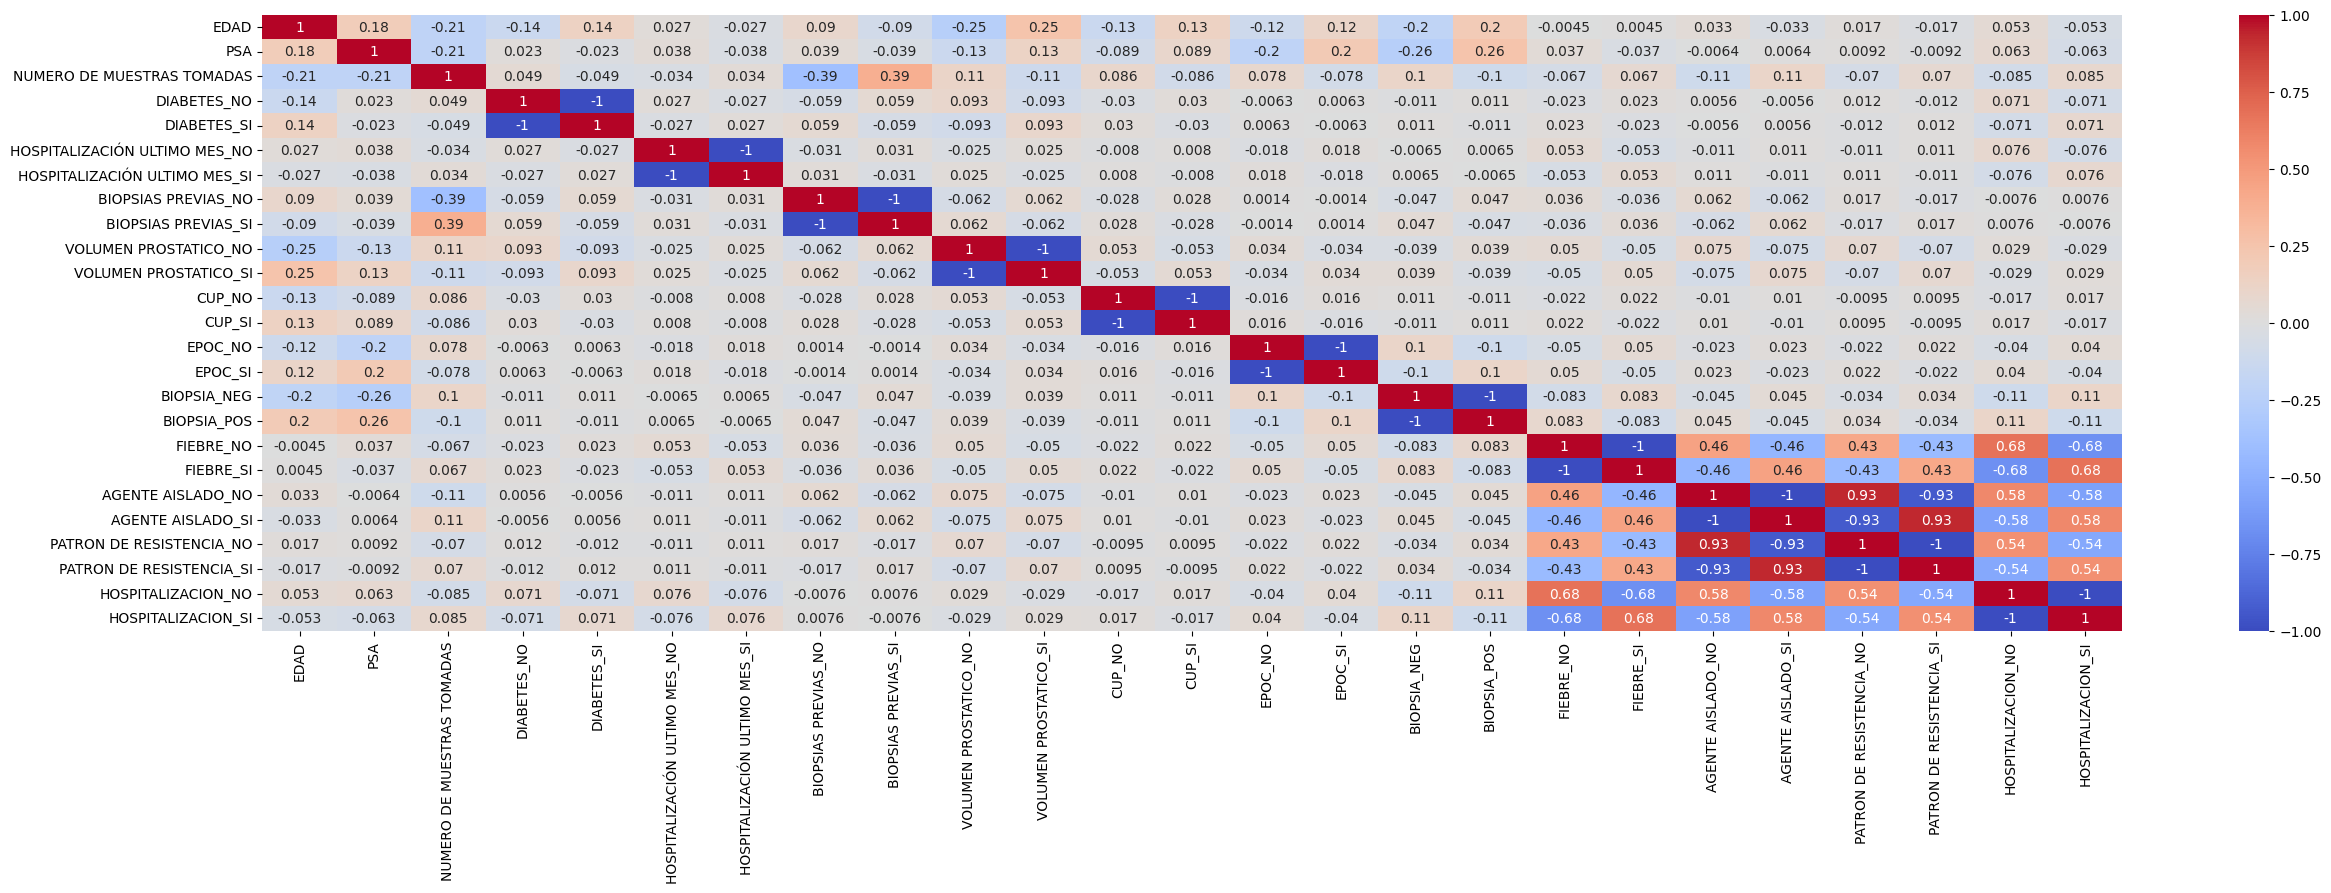

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()
